Preview of data:
                           Perceived_Hearing_Meaning Hearing_FOMO  \
0  Staying independent and alert, Enjoying music,...    Sometimes   
1  Staying independent and alert, Staying connect...       Rarely   
2  Staying independent and alert, I havenâ€™t tho...       Rarely   
3                      Staying independent and alert    Yes often   
4                      Staying independent and alert        Never   

  Hearing_Test_Barrier                            Missed_Important_Sounds  \
0                 Cost                       Yes, in family conversations   
1  Never felt the need  Yes, in public spaces (trains, shops, announce...   
2                Shame      Yes, during important work or school meetings   
3    Lack of awareness      Yes, during important work or school meetings   
4    Lack of awareness                     No, I usually hear things well   

  Left_Out_Due_To_Hearing Daily_Headphone_Use  Belief_Early_Hearing_Care  \
0              Yes, often    

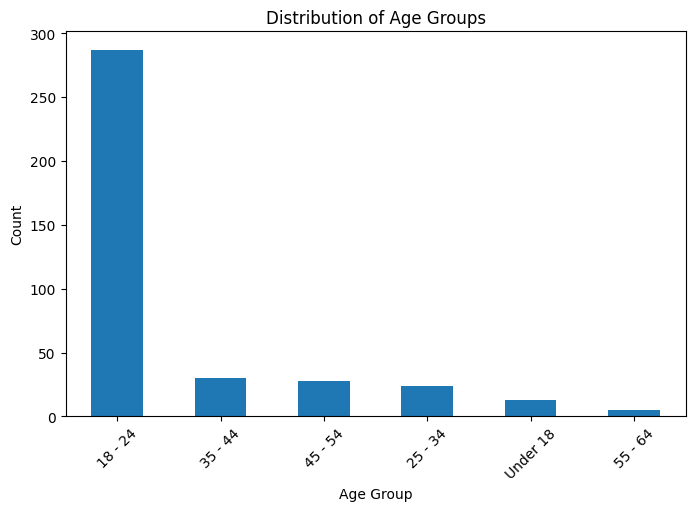

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


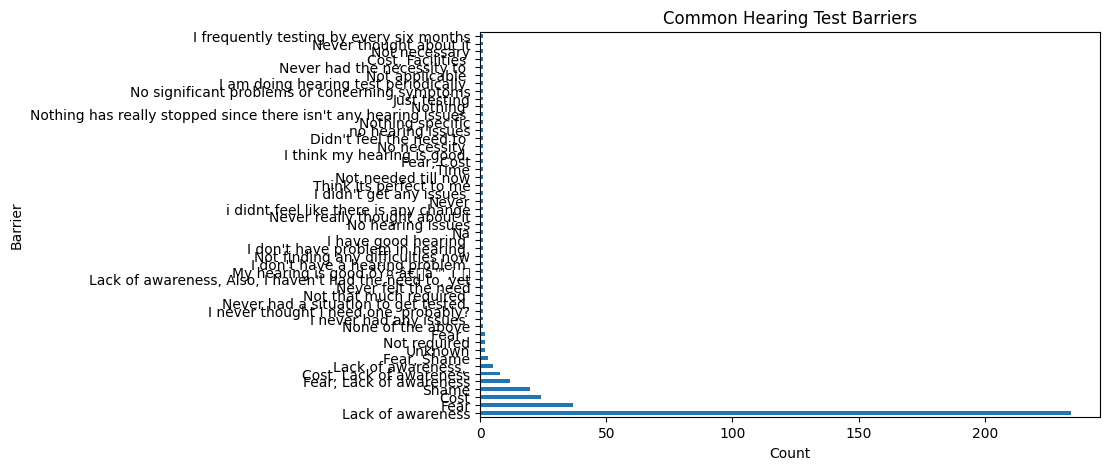

/tmp/ipython-input-3258931823.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby("Age_group")["Interested_App_Binary"].mean()).plot(kind="bar")


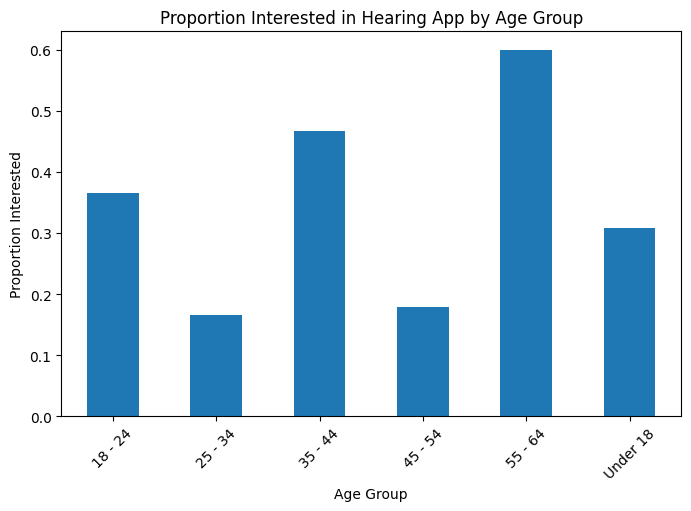

/tmp/ipython-input-3258931823.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby("Age_group")["FOMO_Score"].mean()).plot(kind="bar")


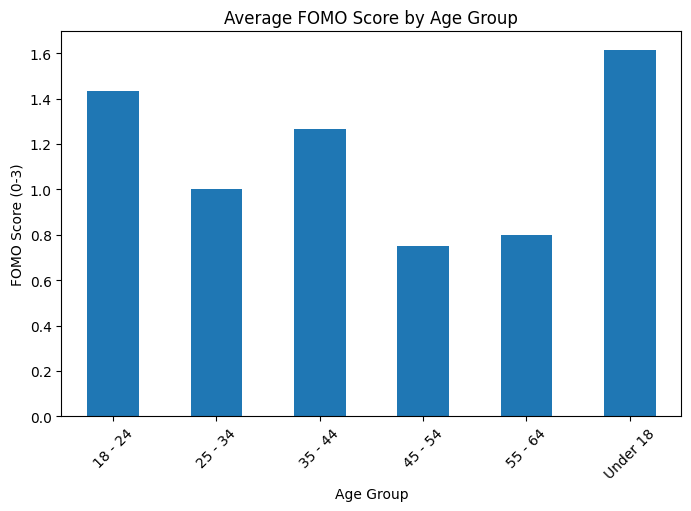

/tmp/ipython-input-3258931823.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby("Age_group")["Missed_Sounds_Binary"].mean()).plot(kind="bar")


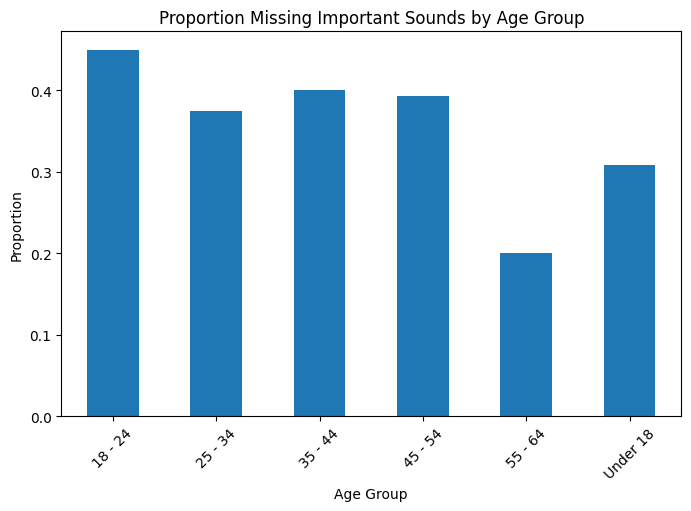


Observations:
1. The dataset spans multiple age groups.
2. Cost, shame, and lack of awareness appear as top barriers to hearing tests.
3. Younger groups (18-24) show higher interest in hearing apps.
4. FOMO and missed important sounds vary across age groups, suggesting awareness gaps.



In [11]:
# STEP 1 & 2: Install + Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEP 3: Load Dataset
file_path = "/content/Hearing well-being Survey Report.csv"   # update path if needed
df = pd.read_csv(file_path, encoding="utf-8")

print("Preview of data:")
print(df.head())

# STEP 4: Inspect Data
print("\nInfo:")
print(df.info())
print("\nSummary:")
print(df.describe(include="all").T)

# STEP 5: Handle Missing Values
print("\nMissing Values Before:")
print(df.isna().sum())
df["Hearing_Test_Barrier"] = df["Hearing_Test_Barrier"].fillna("Unknown")
print("\nMissing Values After:")
print(df.isna().sum())

# STEP 6: Convert Data Types
df["Age_group"] = df["Age_group"].astype("category")

# STEP 7: Filter Dataset (example: Age group 18 - 24)
df_filtered = df[df["Age_group"] == "18 - 24"]

# STEP 8: Feature Engineering
df["Interested_App_Binary"] = df["Interest_in_Hearing_App"].astype(str).str.contains("Yes", case=False).astype(int)

fomo_map = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Yes often": 3}
df["FOMO_Score"] = df["Hearing_FOMO"].map(fomo_map)

df["Missed_Sounds_Binary"] = df["Missed_Important_Sounds"].astype(str).str.startswith("Yes").astype(int)

# STEP 9: Visualizations

## 1. Age group distribution
plt.figure(figsize=(8,5))
df["Age_group"].value_counts().plot(kind="bar")
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 2. Hearing test barriers
plt.figure(figsize=(8,5))
df["Hearing_Test_Barrier"].value_counts().plot(kind="barh")
plt.title("Common Hearing Test Barriers")
plt.xlabel("Count")
plt.ylabel("Barrier")
plt.show()

## 3. Interest in app by Age group
plt.figure(figsize=(8,5))
(df.groupby("Age_group")["Interested_App_Binary"].mean()).plot(kind="bar")
plt.title("Proportion Interested in Hearing App by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion Interested")
plt.xticks(rotation=45)
plt.show()

## 4. Avg FOMO score by Age group
plt.figure(figsize=(8,5))
(df.groupby("Age_group")["FOMO_Score"].mean()).plot(kind="bar")
plt.title("Average FOMO Score by Age Group")
plt.xlabel("Age Group")
plt.ylabel("FOMO Score (0-3)")
plt.xticks(rotation=45)
plt.show()

## 5. Missed sounds by Age group
plt.figure(figsize=(8,5))
(df.groupby("Age_group")["Missed_Sounds_Binary"].mean()).plot(kind="bar")
plt.title("Proportion Missing Important Sounds by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

# STEP 10: Interpretation (printed)
print("""
Observations:
1. The dataset spans multiple age groups.
2. Cost, shame, and lack of awareness appear as top barriers to hearing tests.
3. Younger groups (18-24) show higher interest in hearing apps.
4. FOMO and missed important sounds vary across age groups, suggesting awareness gaps.
""")


In [ ]:
df.describe()

,Belief_Early_Hearing_Care,Interested_App_Binary,FOMO_Score,Missed_Sounds_Binary
count,387.000000,387.000000,387.000000,387.000000
mean,3.958656,0.348837,1.341085,0.428941
std,1.266690,0.477219,0.956267,0.495565
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,1.000000,3.000000,1.000000
